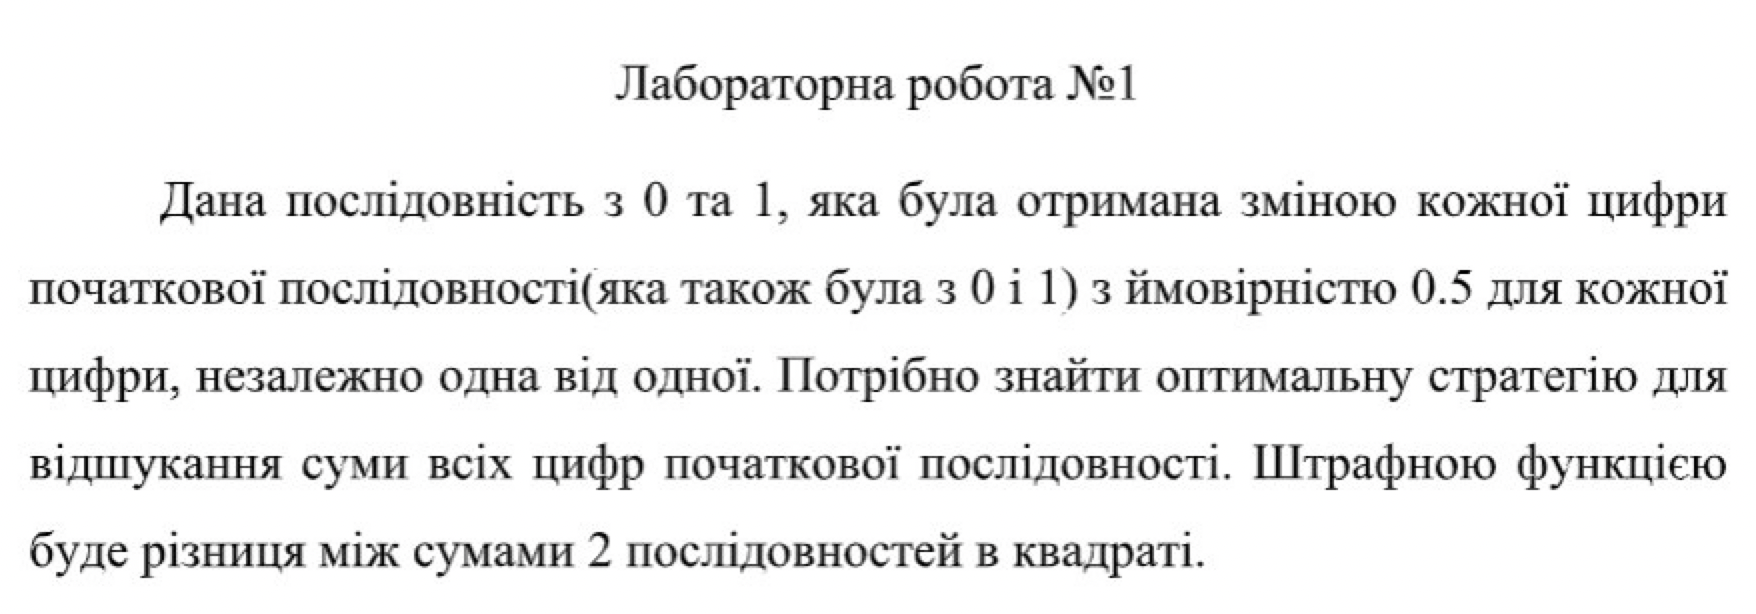

In [1]:
import numpy as np

In [ ]:
from itertools import product

def loss(q_hat, k):
    return (q_hat - sum(k)) ** 2

n=15

sequences = list(product([0, 1], repeat=n))
D=list(range(n+1))
Res=[]
for q_hat in D:
  Res.append([np.sum(loss(q_hat,k)) for k in sequences])

np.argmin(np.sum(Res,axis=1))

7

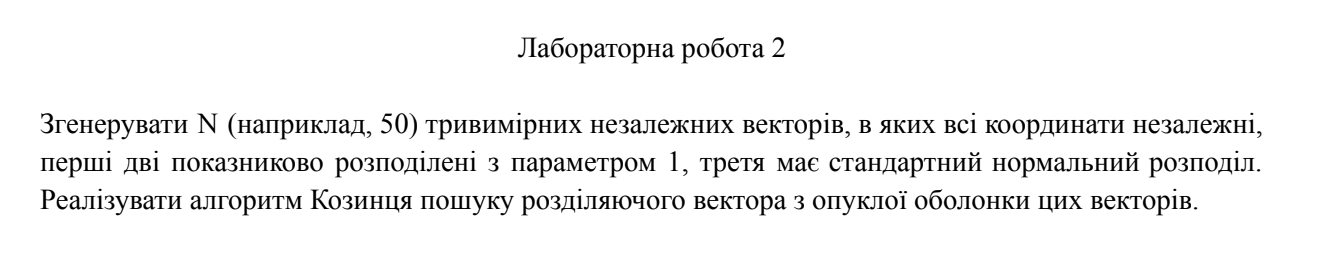

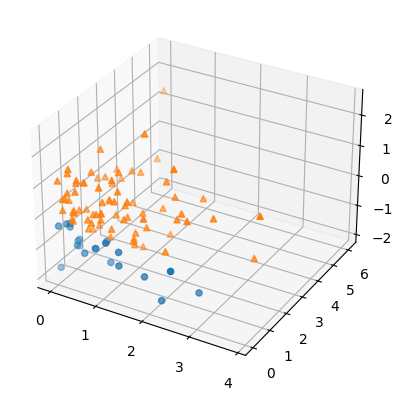

In [111]:
import matplotlib.pyplot as plt
import numpy as np

def generate_samples(size):
    exponential_samples1 = np.random.exponential(scale=1, size=size)
    exponential_samples2 = np.random.exponential(scale=1, size=size)
    normal_samples = np.random.normal(loc=0, scale=1, size=size)

    return np.array([exponential_samples1,exponential_samples2, normal_samples])

N=100
X = generate_samples(N)

labels = divider_coefficients = np.array([0, -1, 0])
labels = np.where(X[2] > np.dot(np.vstack((X[0], X[1], np.ones_like(X[0]))).T, divider_coefficients), 1, 0)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[0,labels==0], X[1,labels==0], X[2,labels==0],marker='o')
ax.scatter(X[0,labels==1], X[1,labels==1], X[2,labels==1],marker='^')

In [112]:
def kozinec(X, y, max_iterations):
    Z = np.vstack((np.where(y == 0, X, -X), np.where(y == 0, 1, -1)))  # transformed training set
    v = Z[:, 0]  # init vector of weights

    for _ in range(max_iterations):
        # terminal condition
        prediction = np.where(np.dot(v, Z) > 0, True, False)

        # if all inequalities are satisfied -> terminate the algorithm
        if np.all(prediction):
            w, b = v[:-1], v[-1]
            return w, b

        # else update vector of weights and continue
        z = Z[:, np.argmax(np.logical_not(prediction))]
        k = np.dot(v, (v - z)[:, None]) / np.linalg.norm(v - z)**2
        v = (1 - k) * v + k * z

    # solution is not found in the given number of iterations
    w, b = float('nan'), float('nan')
    return w, b


w, b = kozinec(X, labels, 100)
w,b

(array([-0.02975565, -0.18991621, -0.16220124]), 0.045144979667808754)

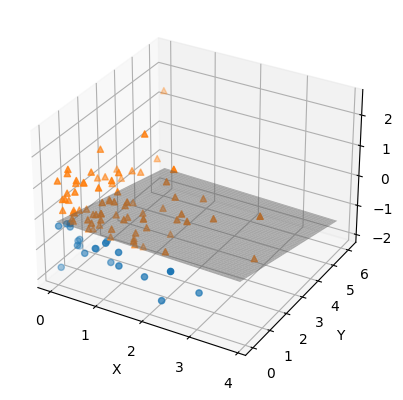

In [118]:
def plot_surface(coefficients):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(X[0,labels==0], X[1,labels==0], X[2,labels==0],marker='o')
    ax.scatter(X[0,labels==1], X[1,labels==1], X[2,labels==1],marker='^')

    # Plot the surface
    x_range = np.linspace(min(X[0]), max(X[0]), 100)
    y_range = np.linspace(min(X[1]), max(X[1]), 100)
    X_mesh, Y_mesh = np.meshgrid(x_range, y_range)

    Z_mesh = coefficients[0] * X_mesh + coefficients[1] * Y_mesh + coefficients[2]

    ax.plot_surface(X_mesh, Y_mesh, Z_mesh, alpha=0.5, color='gray',label='kozinec alg')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

plot_surface(w)

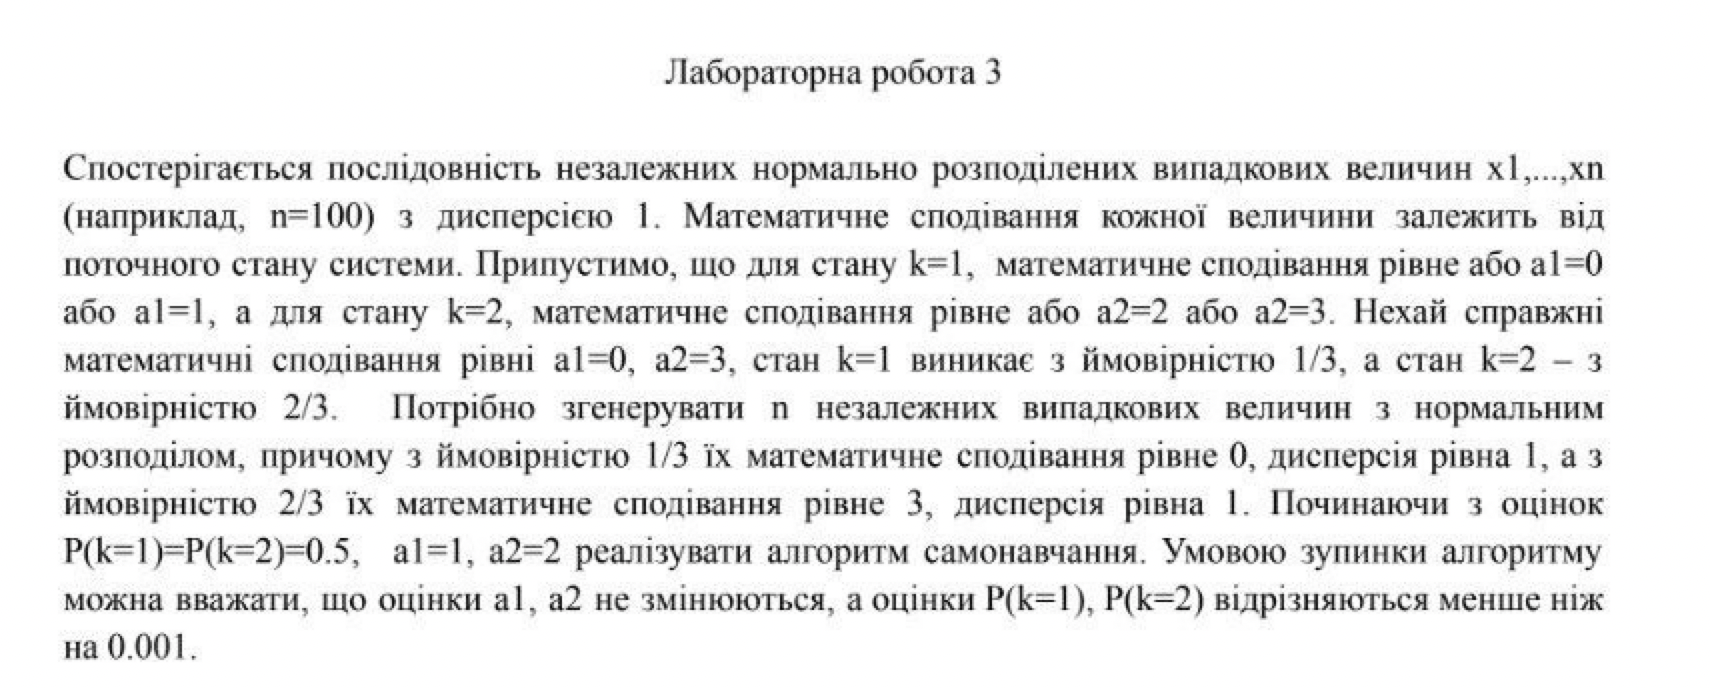

In [201]:
from scipy import stats

def generate_random_variables(n):
    n_1 = n // 3
    n_2 = n - n_1
    random_variables_1 = np.random.normal(loc=0, scale=1, size=n_1)
    random_variables_2 = np.random.normal(loc=3, scale=1, size=n_2)
    random_variables = np.concatenate((random_variables_1, random_variables_2))
    np.random.shuffle(random_variables)

    return random_variables

def maximise(val,alpha):
  pdf_values=[sum([alp*np.log10(stats.norm.pdf(x,loc=a)) for alp,x in zip(alpha,X)])for a in val]
  max_pdf_value = max(pdf_values)
  optimal_mean = val[pdf_values.index(max_pdf_value)]
  return optimal_mean


#_________
N=1000

a_1=1
a_2=2
p_1=0.5
p_2=2

iteration=0
X=generate_random_variables(N)
state_1=[0,1]
state_2=[2,3]

a_1_prev=None
a_2_prev=None
p_1_prev=0
p_2_prev=0
#_________


while (np.abs(p_1_prev-p_1)>0.00001 and np.abs(p_2_prev-p_2)>0.00001) and (a_1_prev!=a_1 and a_2_prev!=a_2):
  alpha_1=[(p_1*stats.norm.pdf(x,loc=a_1))/(p_1*stats.norm.pdf(x,loc=a_1)+p_2*stats.norm.pdf(x,loc=a_2)) for x in X]
  alpha_2=[(p_2*stats.norm.pdf(x,loc=a_2))/(p_1*stats.norm.pdf(x,loc=a_1)+p_2*stats.norm.pdf(x,loc=a_2)) for x in X]

  p_1_star=1/N*sum(alpha_1)
  p_2_star=1/N*sum(alpha_2)
  a_1_prev=a_1
  a_2_prev=a_2
  a_1=maximise(state_1,alpha_1)
  a_2=maximise(state_2,alpha_2)
  p_1_prev=p_1
  p_2_prev=p_2
  p_1=p_1_star
  p_2=p_2_star
  iteration+=1

  print(f'{iteration}. probs: {p_1,p_2}, means {a_1,a_2}')


1. probs: (0.22313875974443176, 0.7768612402555677), means (0, 3)
2. probs: (0.30380330979984727, 0.6961966902001518), means (0, 3)
